In [1]:
import numpy as np
from keras import models
from keras import layers
import pandas as pd
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def baselineModel(loss):
    model = models.Sequential()
    model.add(layers.Dense(units=64,activation='relu',input_shape=(X_train.shape[1], )))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=1))
    model.compile(optimizer='Adam',loss=loss,metrics=['mae'])
    return model
def Optimizer(o):
    model = models.Sequential()
    model.add(layers.Dense(units=64,activation='relu',input_shape=(X_train.shape[1], )))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=1))
    model.compile(optimizer=o,loss=key,metrics=['mae'])
    return model
def meanabsoluteError(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        sum_error += abs(predicted[i] - actual[i])
    return sum_error / float(len(actual))

In [3]:
def graphPlot(history,optimizer,loss):
    val_mae = history.history['val_mae']
    print(optimizer,"-",loss)
    smooth_mae_history = smoothing(val_mae[10:])

    plt.plot(range(1,len(smooth_mae_history) + 1),smooth_mae_history,'r')
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.figure()
    plt.show()
def smoothing(points,factor = 0.85):
    smoothed_pts = []
    for p in points:
        if smoothed_pts:
            previous = smoothed_pts[-1]
            smoothed_pts.append(previous * factor + p * (1-factor))
        else:
            smoothed_pts.append(p)
    return smoothed_pts

In [4]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",header=None)

X = dataset.iloc[:,1:-1]
Y = dataset.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state = 43325)
X_train = np.array(X_train).astype('float32')
Y_train = np.array(Y_train).astype('float32')
X_test  = np.array(X_test).astype('float32')
Y_test  = np.array(Y_test).astype('float32')
# Standardizing dataset
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_test  = (X_test - X_train_mean)  / X_train_std
# Validation data
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 43325)
eval_dic = dict() 
optimizer = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Nadam', 'rmsprop']
loss = ['mse','logcosh']
for l in loss:
    network = baselineModel(l)
    history = network.fit(x_train, y_train ,epochs=300, batch_size=128,validation_data=(x_val,y_val),verbose=0)
    temp = np.average(history.history['val_mae'])
    eval_dic[l] = temp
small = 9999999
for i in eval_dic.values():
    if i < small:
        small = i
for key,value in eval_dic.items():
    if value == small:
        loss_optimal = key
        print("Loss function:: ",key)

Loss function::  logcosh


Adadelta - logcosh


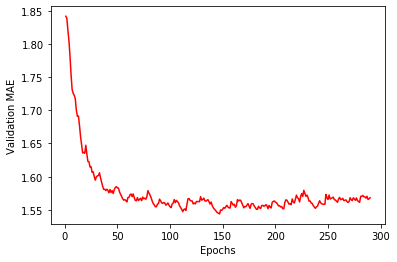

<Figure size 432x288 with 0 Axes>

Adagrad - logcosh


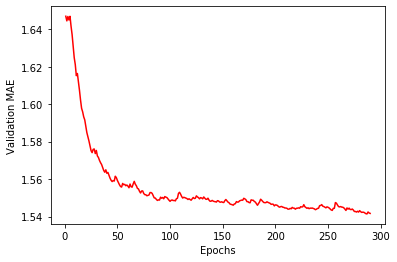

<Figure size 432x288 with 0 Axes>

Adam - logcosh


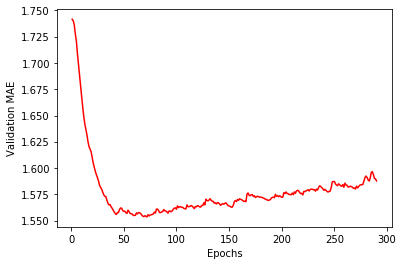

<Figure size 432x288 with 0 Axes>

Adamax - logcosh


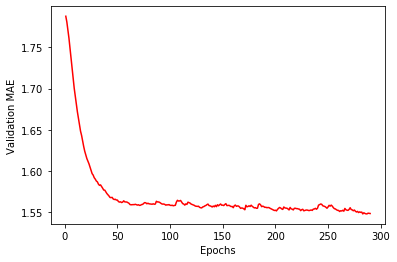

<Figure size 432x288 with 0 Axes>

Nadam - logcosh


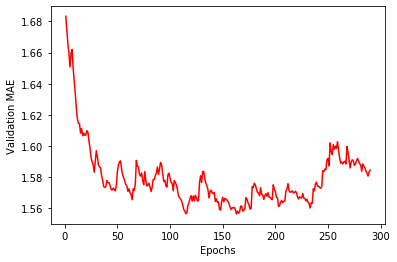

<Figure size 432x288 with 0 Axes>

rmsprop - logcosh


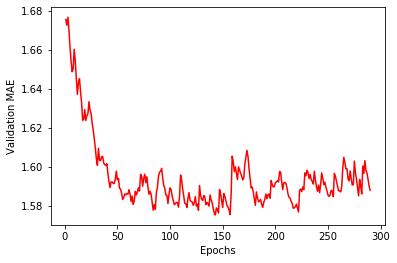

<Figure size 432x288 with 0 Axes>

In [5]:
optimizer_dict = {}
optimizer_perf = {}
for o in optimizer:
    network = Optimizer(o) 
    history=network.fit(x_train,y_train,epochs=300,batch_size=128,validation_data=(x_val,y_val),verbose=0)
    graphPlot(history,o,key)

In [6]:
import time as t
print("Time Taken for optimizer\n")
for o in optimizer:
    network = Optimizer(o)
    start_time = t.time()
    history=network.fit(x_train,y_train,epochs=150,batch_size=128,validation_data=(x_val,y_val),verbose=0)
    end_time = t.time()
    time_taken = end_time-start_time
    optimizer_dict[o]=time_taken
    temp = np.average(history.history['val_mae'])
    optimizer_perf[o]=temp
    print(o," is ",time_taken,"seconds")

Time Taken for optimizer

Adadelta  is  2.964693069458008 seconds
Adagrad  is  2.5420830249786377 seconds
Adam  is  2.9216420650482178 seconds
Adamax  is  2.7293548583984375 seconds
Nadam  is  3.0427229404449463 seconds
rmsprop  is  2.5547640323638916 seconds


Adamax - logcosh


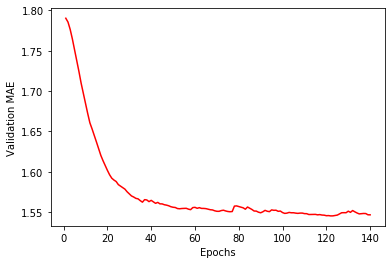

<Figure size 432x288 with 0 Axes>

1045/1045 [==============================] - 0s 12us/step
The test set mae for model 1 is  1.4665671586990356
Adamax - logcosh


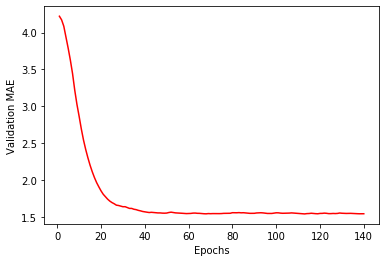

<Figure size 432x288 with 0 Axes>

1045/1045 [==============================] - 0s 18us/step
The test set mae for model 2 is  1.4481985569000244
Adamax - logcosh


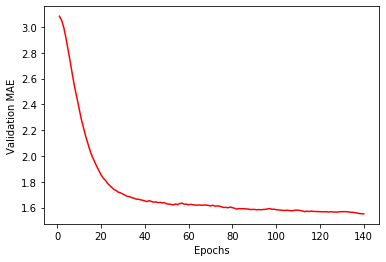

<Figure size 432x288 with 0 Axes>

1045/1045 [==============================] - 0s 16us/step
The test set mae for model 3 is  1.494055986404419
Final regression result = [1.4540844]


In [10]:
def Model1():
    model = models.Sequential()
    model.add(layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(X_train.shape[1], )))
    model.add(layers.Dense(units=128,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(layers.Dense(units=1))
    model.compile(optimizer='Adamax',loss=key,metrics=['mae'])
    return model
def Model2():
    model = models.Sequential()
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(X_train.shape[1], )))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=128,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(layers.Dense(units=1))
    model.compile(optimizer='Adamax',loss=key,metrics=['mae'])
    return model
def Model3():
    model = models.Sequential()
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(X_train.shape[1], )))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=128,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=1))
    model.compile(optimizer='Adamax',loss=key,metrics=['mae'])
    return model
network = Model1()
history=network.fit(x_train,y_train,epochs=150,batch_size=128,validation_data=(x_val,y_val),verbose=0)
graphPlot(history,"Adamax",key)
_,test_mae = network.evaluate(X_test,Y_test)
output1 = network.predict(X_test)
print("The test set mae for model 1 is ",test_mae)
network.save("Regression_model1")
network = Model2()
history=network.fit(x_train,y_train,epochs=150,batch_size=128,validation_data=(x_val,y_val),verbose=0)
graphPlot(history,"Adamax",key)
_,test_mae = network.evaluate(X_test,Y_test)
output2 = network.predict(X_test)
print("The test set mae for model 2 is ",test_mae)
network.save("Regression_model2")
network = Model3()
history=network.fit(x_train,y_train,epochs=150,batch_size=128,validation_data=(x_val,y_val),verbose=0)
graphPlot(history,"Adamax",key)
_,test_mae = network.evaluate(X_test,Y_test)
output3 = network.predict(X_test)
print("The test set mae for model 3 is ",test_mae)
network.save("Regression_model3")

avg = (output1+output2+output3)/3
Ensemble = meanabsoluteError(Y_test,avg)
print("Final regression result =",Ensemble)